In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=9
paper='1508.00296'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's carefully analyze this Hamiltonian to answer the questions.

First, I need to identify all the flavors in the system based on the creation and annihilation operators.

In this Hamiltonian, I can see:
- $a^{\dagger}_{k \sigma}, a_{k \sigma}$: These operators are associated with N atoms (based on the terms with $t_N$)
- $b^{\dagger}_{k \sigma}, b_{k \sigma}$: These operators are associated with B atoms (based on the terms with $t_B$)
- $\sigma$ is the spin index, which appears to take two values (since there are terms like $\sigma \neq \sigma'$)

So the system has two types of atoms/sites (N and B) and two types of spins (up and down, though not explicitly labeled as such).

Now, let me analyze the structure of D:

This system has two different types of atoms (N and B) and two spin states (which I'll call up and down).
So D = (2, 2), where the first dimension is for the atom type and the second is for the spin.

For the basis ord

In [7]:
print(generated_code['thinking'])

Let's carefully analyze this Hamiltonian to answer the questions.

First, I need to identify all the flavors in the system based on the creation and annihilation operators.

In this Hamiltonian, I can see:
- $a^{\dagger}_{k \sigma}, a_{k \sigma}$: These operators are associated with N atoms (based on the terms with $t_N$)
- $b^{\dagger}_{k \sigma}, b_{k \sigma}$: These operators are associated with B atoms (based on the terms with $t_B$)
- $\sigma$ is the spin index, which appears to take two values (since there are terms like $\sigma \neq \sigma'$)

So the system has two types of atoms/sites (N and B) and two types of spins (up and down, though not explicitly labeled as such).

Now, let me analyze the structure of D:

This system has two different types of atoms (N and B) and two spin states (which I'll call up and down).
So D = (2, 2), where the first dimension is for the atom type and the second is for the spin.

For the basis order:
0: atom type (0: N, 1: B)
1: spin (0: up, 1: down

In [8]:
print(generated_code['text'])

# ANSWER:

1) Number of Flavors, D = (2, 2)
Basis Order:
0: site (0: N, 1: B)
1: spin (0: up, 1: down)

2) EXP-VAL DEPENDENT TERMS: {
    r"\langle b^{\dagger}_{k, \sigma} b_{k, \sigma} \rangle": "Mean of B atom density with spin σ",
    r"\langle a^{\dagger}_{k, \sigma} a_{k, \sigma} \rangle": "Mean of N atom density with spin σ"
}
  
TERMS:
- t_{\rm N} \sum_{k, \sigma} a^{\dagger}_{k \sigma} a_{k \sigma} \sum_n e^{-ik\cdot n} -> H[0, σ, 0, σ, k], NI
- t_{\rm B} \sum_{k, \sigma} b^{\dagger}_{k \sigma} b_{k \sigma} \sum_n e^{-ik\cdot n} -> H[1, σ, 1, σ, k], NI
- t_{\rm BN} \sum_{k, \sigma} (a^{\dagger}_{k \sigma} b_{k \sigma} \sum_{n'} \exp{-ik\cdot n'}) -> H[0, σ, 1, σ, k], NI
- t_{\rm BN} \sum_{k, \sigma} (b^{\dagger}_{k \sigma} a_{k \sigma} \sum_{n'} \exp{ik\cdot n'}) -> H[1, σ, 0, σ, k], NI
- \Delta \sum_{k, \sigma} a^{\dagger}_{k \sigma} a_{k \sigma} -> H[0, σ, 0, σ, k], NI
- \frac{U_{\rm B}}{N} \sum_{k, \sigma \neq \sigma'} \langle b^{\dagger}_{k, \sigma} b_{k, \sigma} \rangle b^

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """Hartree-Fock Hamiltonian for a system with N and B atoms on a square-centered lattice.
    
    This implements a model with two types of atoms (N at vertices and B at center) and two spin states.
    The Hamiltonian includes hopping terms and various interaction terms.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float, optional): Filling factor for the system. Defaults to 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
        self.lattice = 'square'
        self.D = (2, 2)  # (site, spin)
        self.basis_order = {'0': 'site', '1': 'spin'}
        # Order for each flavor:
        # site: 0=N (vertex), 1=B (center)
        # spin: 0=up, 1=down

        # Occupancy relevant parameters
        self.nu

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1508_00296_9.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

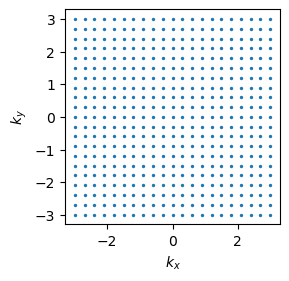

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0},filling_factor=1/2)


In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

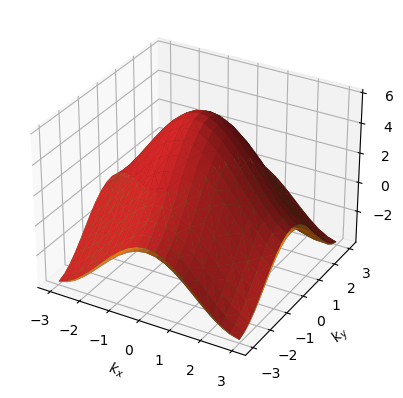

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

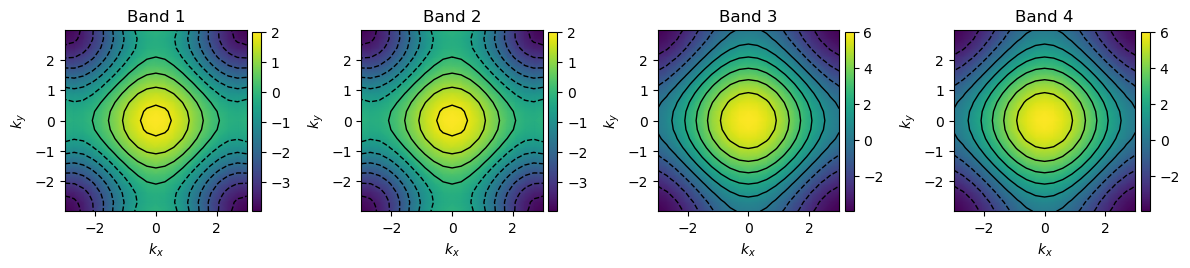

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'V_BN':1e-5,'U_N':0,'U_B':0,'V_B':0},filling_factor=1/2)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 0


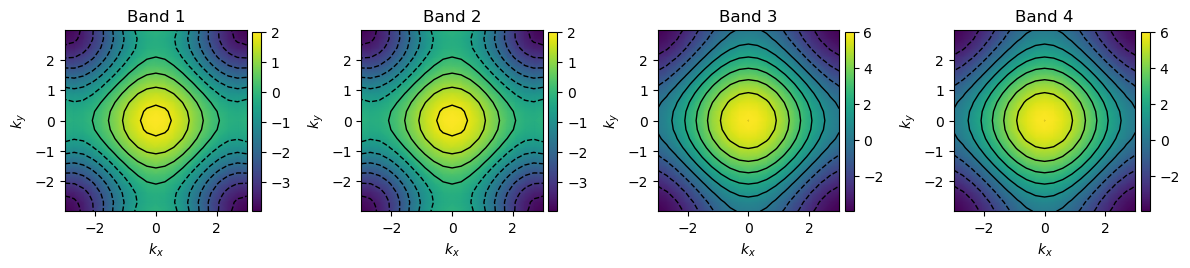

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'V_BN':1e5,'U_N':0,'U_B':0,'V_B':0},filling_factor=1/2)


In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
h_nonint[1,1,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 1


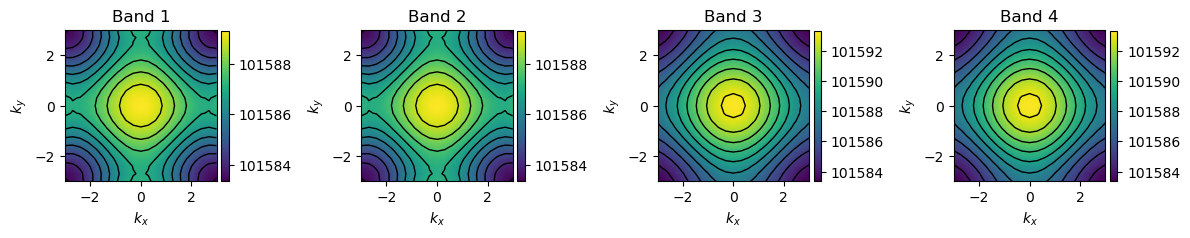

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is -5.94
U/T is 41372.48
mean_U is 25198.41


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image and check the rubric points to determine if this is correct.

First, let's understand what we're looking at:
- The image shows a grid of dots in a 2D plane
- The x-axis is labeled as k_x and ranges from approximately -3 to 3
- The y-axis is labeled as k_y and ranges from approximately -3 to 3
- The dots appear to be uniformly spaced in a square grid pattern

Now, I need to check if this represents a proper momentum space mesh in the first Brillouin zone for the given problem.

The Hamiltonian describes a square-centered lattice with two types of atoms (N at vertices, B at centers). Let's think about what the first Brillouin zone should look like for this system.

For a square lattice, the first Brillouin zone is also a square in reciprocal space. The boundaries of this zone are typically at k_x, k_y = ±π/a where a is the lattice constant (which seems to be set to 1 here).

The rubric asks me to check:
1. If t

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the band structure plots shown in the image to determine whether they correctly represent the non-interacting band structure of a square-centered lattice according to the rubric.

First, I'll identify what we're looking at in the image:
- Four panels showing "Band 1", "Band 2", "Band 3", and "Band 4"
- Each panel shows a false color plot with contour lines
- The x and y axes are labeled as kx and ky, representing the wave vectors in reciprocal space
- The color scale indicates energy values

Now, let's go through the rubric requirements:

1. Identify the shape of the Brillouin zone boundary:
   Looking at the plots, we can see that the domain is square-shaped, with kx and ky ranging approximately from -3 to 3. For a square-centered lattice, we would expect a square-shaped Brillouin zone, which is consistent with what's shown.

2. Examine the symmetry of the energy distribution:
   2.1 Highest energy regions (yellow):
 

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper,Gap=0,nu=1/2)
    )


#################### THINKING ####################

Let's analyze this condensed matter physics problem systematically by examining the band structure plots presented in the image and evaluating them against the rubric criteria.

The image shows four false color plots labeled "Band 1", "Band 2", "Band 3", and "Band 4". These appear to be band structure plots in momentum space (k-space), showing the energy distribution across the first Brillouin zone for each band.

Let's go through the rubric criteria one by one:

1. **Brillouin Zone Boundary Shape**
   
   Looking at the plots, we can see that the domain of k_x and k_y extends from approximately -3 to 3 (though the main features are within -2 to 2). For a square-centered lattice (with atoms at vertices and center of square), the first Brillouin zone should be a square. From the plots, the boundary appears to be square-shaped, which is consistent with a square-centered lattice.

2. **Symmetry of Energy Distribution**

   2.1 **Highest

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='V_BN = 1e5',nu=1/2)
    )


#################### THINKING ####################

Let me analyze the image according to the rubric provided. I need to evaluate the false color plots for interacting-renormalized band structure in the first Brillouin zone.

The image shows 4 panels labeled "Band 1", "Band 2", "Band 3", and "Band 4", each showing a false color plot of energy values (around 101584-101592) as a function of k_x and k_y, which represent momentum coordinates in the first Brillouin zone.

I'll go through each point in the rubric:

1. **Shape of the Brillouin zone boundary**:
   From the image, I can see that the Brillouin zone is shown as a square region with boundaries roughly at k_x = ±3 and k_y = ±3. This is consistent with a square-centered lattice (where N atoms are at vertices and B atoms at the center of each square). The Brillouin zone for such a lattice should be square-shaped in k-space.

2. **Symmetry of the energy distribution**:
   
   2.1 **Highest energy regions**: 
   - The highest energy r

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '9' saved to final_answer.yaml
